In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

data = pd.read_excel('Dry_Bean_Dataset.xlsx')
# data.head()

In [2]:
X = data.drop(columns = ['Class'])
y = data['Class']

# Use mapping
y = y.map({'SEKER': 0, 'BARBUNYA': 1, 'BOMBAY': 2, 'CALI': 3, 'HOROZ': 4, 'SIRA': 5, 'DERMASON': 6})



X 是 Pandas DataFrame


In [19]:
label_counts = y.value_counts().sort_index()
print(label_counts)

print(f"Count of data:{y.size}")
# From label_counts we could know how many data we could used
# 5 and 6 训练数据比较多但后面看训练的准确率不是很高，噪音比较多？

Class
0    2027
1    1322
2     522
3    1630
4    1928
5    2636
6    3546
Name: count, dtype: int64
13611


In [4]:
import matplotlib.pyplot as plt
print(plt.colormaps())  # 列出所有可用 colormap

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

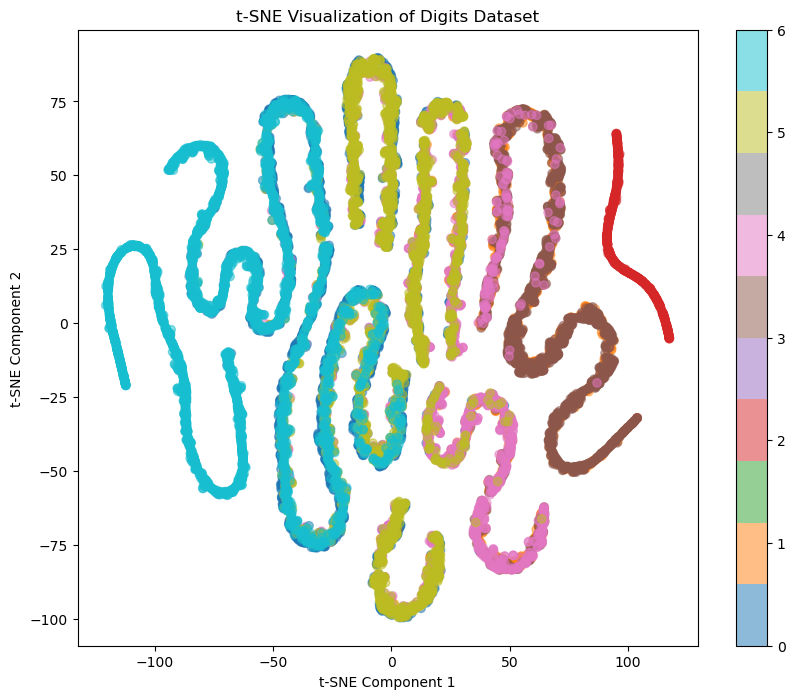

In [3]:
# Try visulization using t-SNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# from sklearn.datasets import load_digits

tsne = TSNE(n_components=2, random_state=42)
# 转换成二维的
X_embedded = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10', alpha=0.5)
plt.colorbar(scatter)
plt.title('t-SNE Visualization of Digits Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
# 丑，标签的覆盖率高，得不到什么有效信息
# 自然就会想到分标签表示数据分布

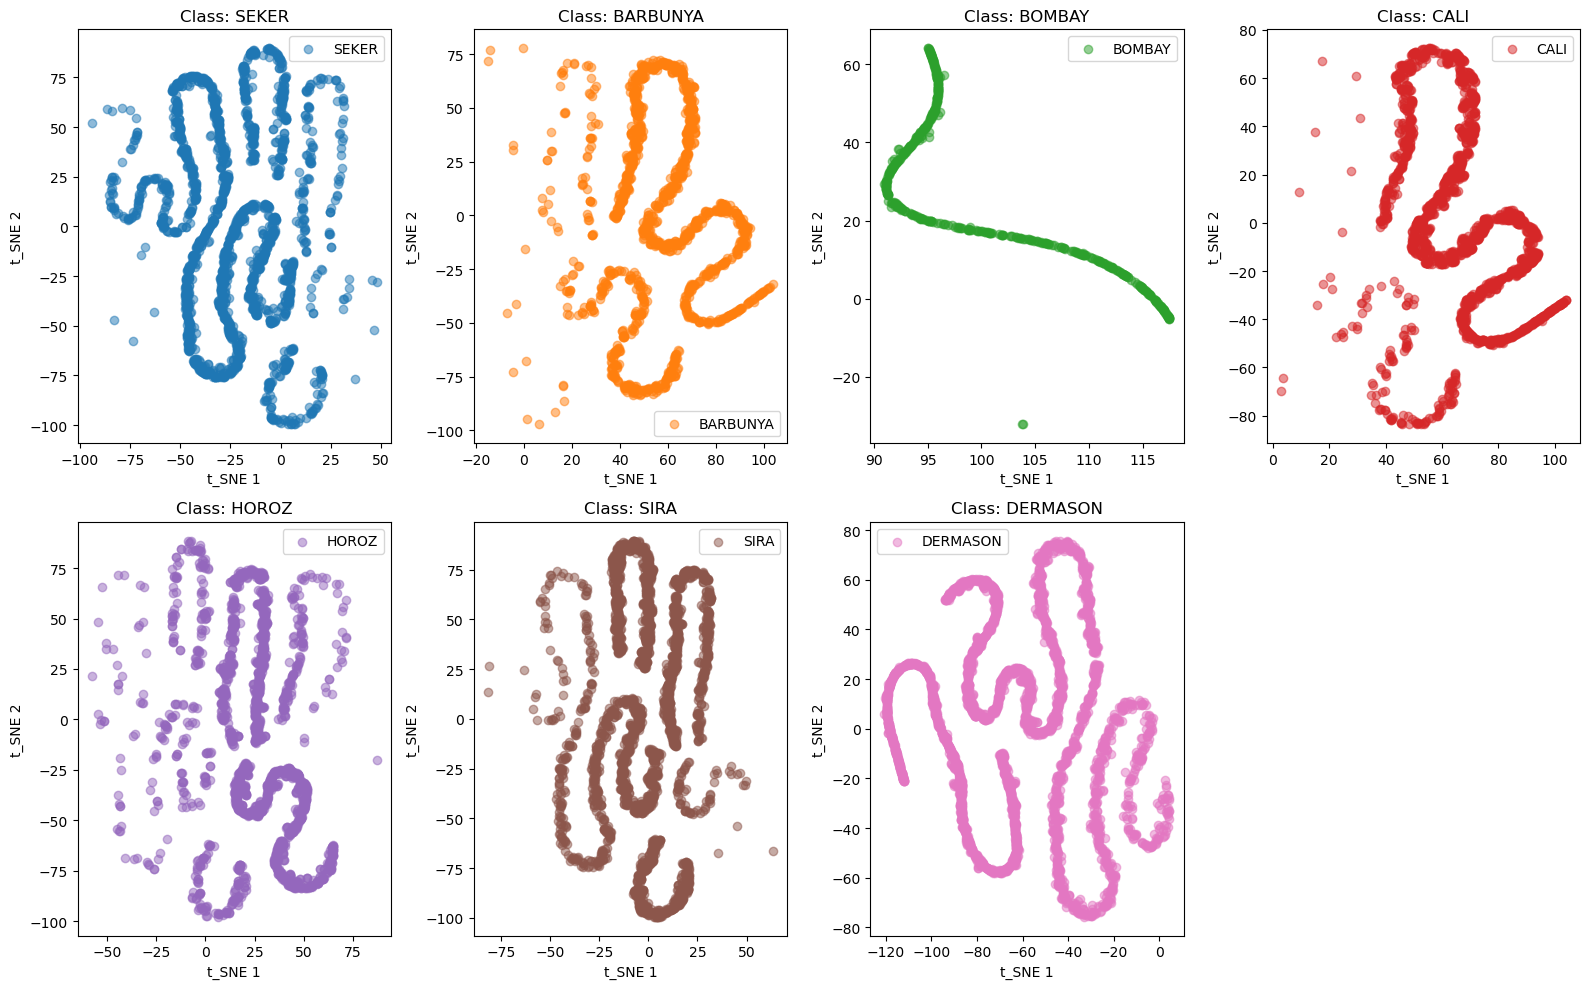

In [5]:
# Try visulization using t-SNE
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize = (16, 10))
axes = axes.ravel()

class_names = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']

for i in range(7):
    ax = axes[i]
    mask = (y == i)

    scatter = ax.scatter(
        X_embedded[mask, 0],
        X_embedded[mask, 1],
        c = [plt.cm.tab10(i)],
        alpha = 0.5,
        label = class_names[i]
    )

    ax.set_title(f"Class: {class_names[i]}")
    ax.set_xlabel('t_SNE 1')
    ax.set_ylabel('t_SNE 2')
    ax.legend()

axes[-1].axis('off')

plt.tight_layout()
plt.show()

# 本来是想映射单独的y，来获得不同标签在空间中的相对位置以更好区分，
# 但发现每个图像的x与y坐标的“标尺”都不一样，同时了解到t-SNE在同时优化所有类别样本和单独优化映射的目标是不一样的，单独优化没有意义
# 因此应该先进行标准化，再进行t—SNE的映射，再在不同图中绘制样本的位置
# 这样就能保证样本的相对位置是有意义的，同时保证xy轴坐标相同，不会出现在图像显示的坐标范围内没有某个标签的数据点的情况。



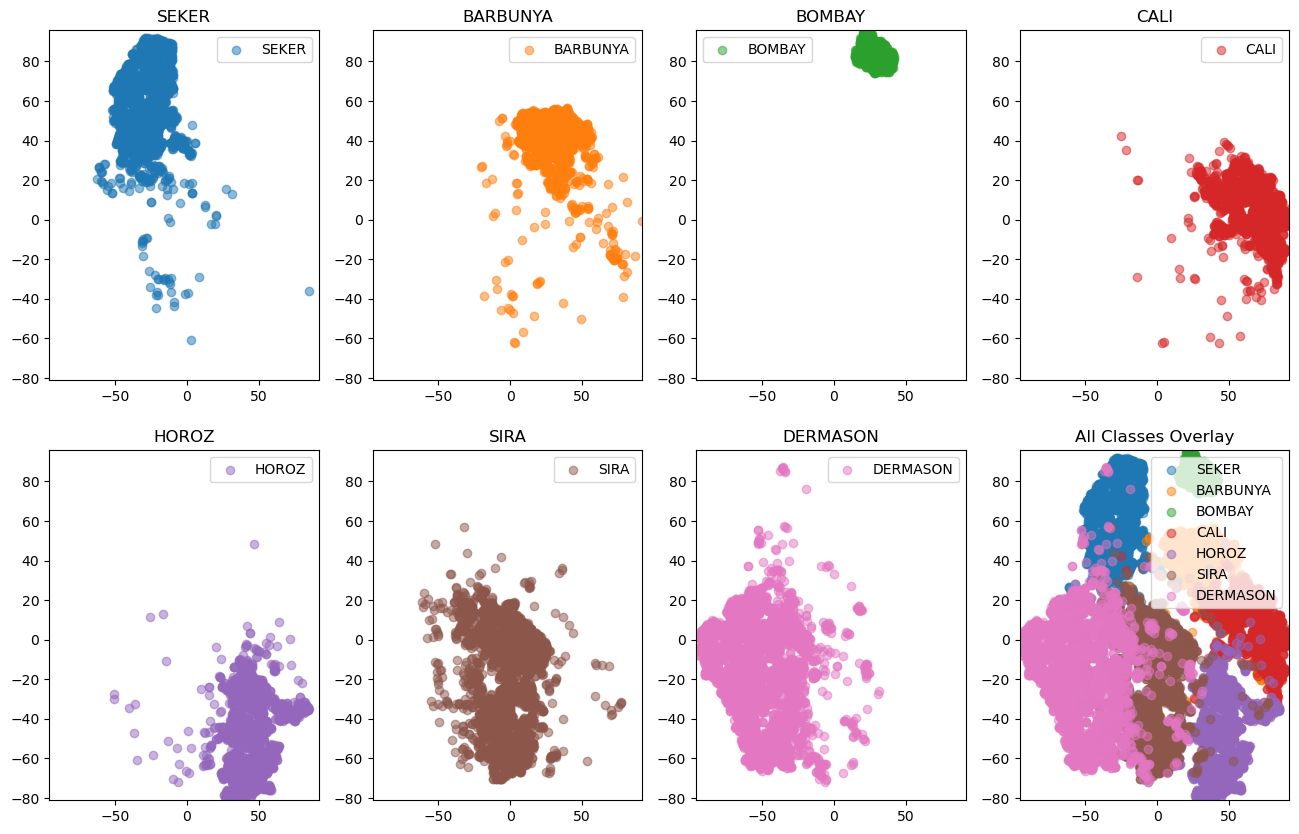

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 对所有标准化的特征进行映射
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_scaled) 

fig, axes = plt.subplots(2, 4, figsize = (16, 10))
axes = axes.ravel()

for i, name in enumerate(class_names):
    ax = axes[i]
    mask = (y == i)
    ax.scatter(X_embedded[mask, 0], X_embedded[mask, 1], c = [plt.cm.tab10(i)], alpha = 0.5, label = name)
    ax.set_title(name)
    ax.set_xlim(X_embedded[:, 0].min(), X_embedded[:, 0].max())
    ax.set_ylim(X_embedded[:, 1].min(), X_embedded[:, 1].max())
    ax.legend()

ax = axes[-1]
for i, name in enumerate(class_names):
    mask = (y == i)
    ax.scatter(X_embedded[mask, 0], X_embedded[mask, 1], c = [plt.cm.tab10(i)], alpha = 0.5, label = name)
ax.set_title("All Classes Overlay")
ax.set_xlim(X_embedded[:, 0].min(), X_embedded[:, 0].max())
ax.set_ylim(X_embedded[:, 1].min(), X_embedded[:, 1].max())
ax.legend()

# plt.tight_layout()
plt.show()

# 可以看到xy轴是相同的尺度了，类别的区别都比较明显，不过边界比较模糊
# 同时有些类别是超级好区分的：比如BOMBAY
# 有一些pairs边界较模糊：(BARBUNYA, CALI)(SIRA, DERMASON)(SEKER, DERMASON)，可能需要着重区分：比如使用决策树？

In [3]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
# print(X_train_scaled)
X_test_scaled = scaler.transform(X_test)

lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_scaled, y_train)

y_pred = lr_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy:.4f}")

# Accuracy: 0.9280

Accuracy: 0.9266


In [4]:
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate

model_evaluation_metrics = {}

conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)

model_evaluation_metrics = {
    'Confusion Matrix': conf_matrix,
    'Classification Report': classif_report
}

print(f"Logistic Regression Evaluation Metrics:")
print("Confusion Matrix:")
print(tabulate(conf_matrix, headers=lr_classifier.classes_, tablefmt='grid'))
print("\nClassification Report:")
print(classif_report)


# From the result we could know: 
# using logistic regression, what kind of result can we get
# what classes is harder to classified: e.g.5&6, 相对来说准确率比较低
# From the support we can also get what? 不同种类的训练数据的数量是不一样的，

Logistic Regression Evaluation Metrics:
Confusion Matrix:
+-----+-----+-----+-----+-----+-----+-----+
|   0 |   1 |   2 |   3 |   4 |   5 |   6 |
+=====+=====+=====+=====+=====+=====+=====+
| 388 |   8 |   0 |   0 |   0 |  11 |   6 |
+-----+-----+-----+-----+-----+-----+-----+
|   0 | 238 |   0 |  14 |   0 |   9 |   0 |
+-----+-----+-----+-----+-----+-----+-----+
|   0 |   0 | 117 |   0 |   0 |   0 |   0 |
+-----+-----+-----+-----+-----+-----+-----+
|   1 |  11 |   0 | 298 |   4 |   3 |   0 |
+-----+-----+-----+-----+-----+-----+-----+
|   0 |   2 |   0 |   2 | 392 |   8 |   4 |
+-----+-----+-----+-----+-----+-----+-----+
|   5 |   0 |   0 |   0 |   7 | 484 |  40 |
+-----+-----+-----+-----+-----+-----+-----+
|   8 |   0 |   0 |   0 |   1 |  56 | 606 |
+-----+-----+-----+-----+-----+-----+-----+

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       413
           1       0.92      0.91      0.92       261
       

In [5]:
# logistic regression with polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# After the polynomial transformation
scaler = StandardScaler().fit(X_train_poly)
X_train_scaled = scaler.transform(X_train_poly)
# print(X_train_scaled)
X_test_scaled = scaler.transform(X_test_poly)

lr_classifier = LogisticRegression(max_iter=10000)
lr_classifier.fit(X_train_scaled, y_train)

y_pred = lr_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy:.4f}")

# Accuracy: max_iter=1000: 0.9302, 即使增加了iteration这个值也没变啊


Accuracy: 0.9277


In [6]:
# SVM
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = svm.SVC(kernel = "poly", C = 100, probability=True)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# Before standardrize
# C=100: 0.6654
# C=10: 0.6408
# After:
# C=100: 0.9310

Accuracy: 0.9306


In [7]:
clf1 = svm.SVC(kernel = "rbf", C = 100, probability=True)
clf1.fit(X_train_scaled, y_train)
y_pred = clf1.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# Before standardrize
# C=100: 0.6497
# C=10: 0.6405
# C=1: 0.6350
# After:
# C=100: 0.9354

Accuracy: 0.9288


In [8]:
model_evaluation_metrics = {}

conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)

model_evaluation_metrics = {
    'Confusion Matrix': conf_matrix,
    'Classification Report': classif_report
}

print(f"Logistic Regression Evaluation Metrics:")
print("Confusion Matrix:")
print(tabulate(conf_matrix, headers=clf.classes_, tablefmt='grid'))
print("\nClassification Report:")
print(classif_report)

Logistic Regression Evaluation Metrics:
Confusion Matrix:
+-----+-----+-----+-----+-----+-----+-----+
|   0 |   1 |   2 |   3 |   4 |   5 |   6 |
+=====+=====+=====+=====+=====+=====+=====+
| 395 |   2 |   0 |   0 |   0 |   9 |   7 |
+-----+-----+-----+-----+-----+-----+-----+
|   3 | 240 |   0 |  12 |   0 |   6 |   0 |
+-----+-----+-----+-----+-----+-----+-----+
|   0 |   0 | 117 |   0 |   0 |   0 |   0 |
+-----+-----+-----+-----+-----+-----+-----+
|   1 |  13 |   0 | 298 |   4 |   1 |   0 |
+-----+-----+-----+-----+-----+-----+-----+
|   0 |   3 |   0 |   7 | 388 |   5 |   5 |
+-----+-----+-----+-----+-----+-----+-----+
|   6 |   2 |   0 |   0 |   6 | 469 |  53 |
+-----+-----+-----+-----+-----+-----+-----+
|   6 |   0 |   0 |   0 |   1 |  42 | 622 |
+-----+-----+-----+-----+-----+-----+-----+

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       413
           1       0.92      0.92      0.92       261
       

In [10]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')  # 加权平均
print(f"F1 score: {f1:.4f}")

F1 score: 0.9288
